In [2]:
import linmix as lm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
%config InlineBackend.figure_format = 'retina'

In [4]:
#Primary masses and errors
p_mass = [35.6, 23.3, 13.7, 31.0, 10.9, 50.6, 35.2, 30.7, 1.46, 35.5, 39.6]
p_dnerr = [3.0, 5.5, 3.2, 5.6, 1.7, 10.2, 6.0, 3.0, 0.1, 4.7, 6.6]
p_uperr = [4.8, 14.0, 8.8, 7.2, 5.3, 16.6, 8.3, 5.7, 0.12, 7.5, 10.0]

#Biggest and littlest of error bars
p_berr = [4.8, 14.0, 8.8, 7.2, 5.3, 16.6, 8.3, 5.7, 0.12, 7.5, 10.0]
p_serr = [3.0, 5.5, 3.2, 5.6, 1.7, 10.2, 6.0, 3.0, 0.1, 4.7, 6.6]

#secondary masses and errors
s_mass = [30.6, 13.6, 7.7, 20.1, 7.6, 34.3, 23.8, 25.3, 1.27, 26.8, 29.4]
s_dnerr = [4.4, 4.8, 2.6, 4.5, 2.1, 10.1, 5.1, 4.1, 0.09, 5.2, 7.1]
s_uperr = [3.0, 4.1, 2.2, 4.9, 1.3, 9.1, 5.2, 2.9, 0.09, 4.3, 6.3]

# Biggest and littlest for secondary
s_berr = [4.4, 4.8, 2.6, 4.9, 2.1, 10.1, 5.2, 4.1, 0.09, 5.2, 7.1]
s_serr = [3.0, 4.1, 2.2, 4.5, 1.3, 9.1, 5.1, 2.9, 0.09, 4.3, 6.3]

In [8]:
#zeropoints, slopes, scaters = [],[],[]
lx = lm.LinMix(p_mass,s_mass,xsig=p_berr,ysig=s_berr)
lx.run_mcmc(miniter=5000,silent=True)
zeropoints_b = np.median(lx.chain[:]['alpha'])
slopes_b = np.median(lx.chain[:]['beta'])
scatters_b = np.sqrt(np.median(lx.chain[:]['sigsqr']))


In [17]:
lx2 = lm.LinMix(p_mass,s_mass,xsig=p_serr,ysig=s_serr)
lx2.run_mcmc(miniter=5000,silent=True)
zeropoints_s = np.median(lx2.chain[:]['alpha'])
slopes_s = np.median(lx2.chain[:]['beta'])
scatters_s = np.sqrt(np.median(lx2.chain[:]['sigsqr']))


In [9]:
%matplotlib inline

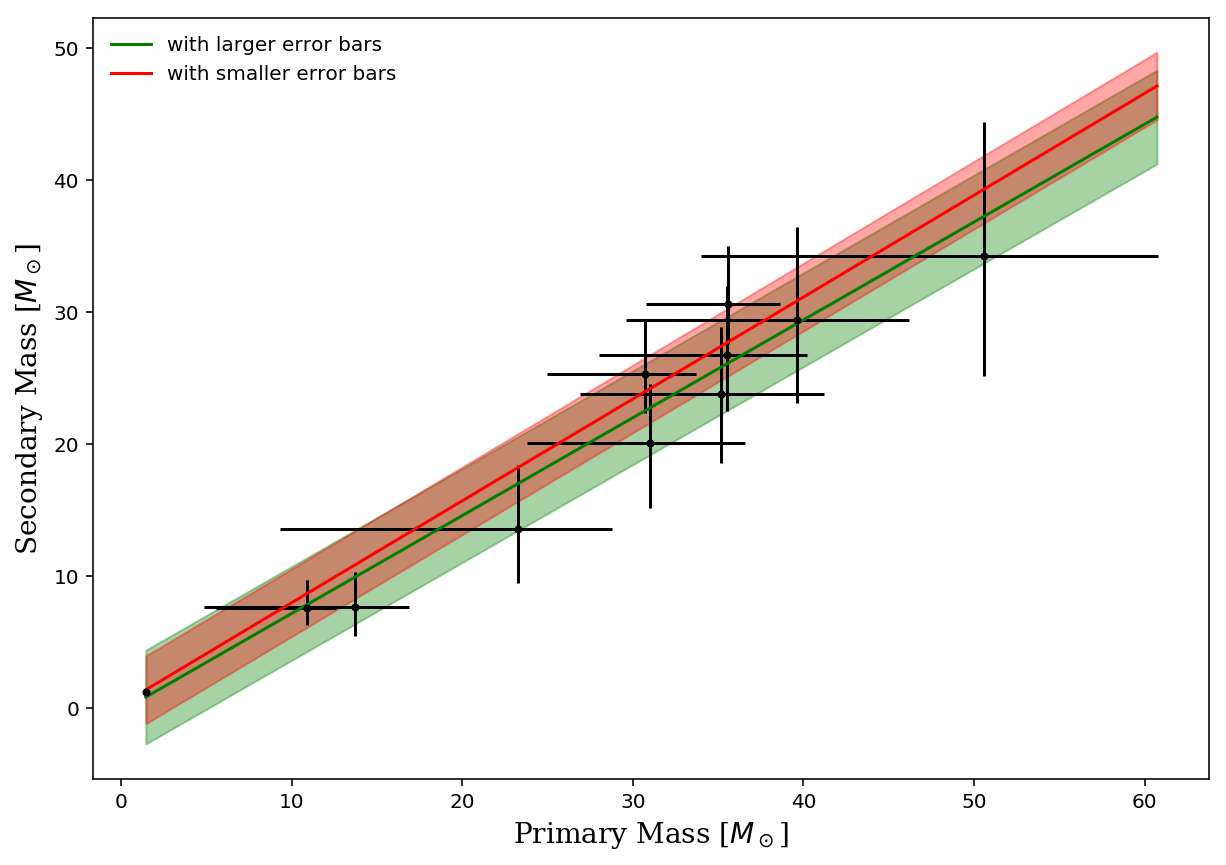

In [25]:
x_arrange = np.linspace(np.amin(p_mass), np.amax(p_mass)*1.2, 100)
plt.figure(figsize=(10,7))
plt.errorbar(p_mass, s_mass, xerr=(p_uperr,p_dnerr), yerr=(s_uperr,s_dnerr),fmt='.k')
# big error bars
plt.plot(x_arrange, x_arrange*slopes-zeropoints, color='g', label='with larger error bars')
plt.fill_between(x_arrange,(x_arrange*slopes-zeropoints)-scatters,y2=(x_arrange*slopes-zeropoints)+scatters,color='g', alpha=0.35 )
#small error bars
plt.plot(x_arrange, x_arrange*slopes_s-zeropoints_s, color='r', label='with smaller error bars')
plt.fill_between(x_arrange,(x_arrange*slopes_s-zeropoints_s)-scatters_s,y2=(x_arrange*slopes_s-zeropoints_s)+scatters_s,color='r', alpha=0.35 )
plt.xlabel(r'Primary Mass [$M_\odot$]', fontsize=14, family='serif')
plt.ylabel(r'Secondary Mass [$M_\odot$]', fontsize=14, family='serif')
plt.legend(frameon= False)

In [26]:
# let's try something with the snr and the marginals/confidents
mg_far = [10.17, 8.56, 4.77,6.0, 10.12, 11.18, 6.26, 4.55, 8.22, 6.47, 1.94, 10.46, 10.97, 10.75]
mg_mass = [5.12, 2.01, 1.24, 1.54, 7.86, 7.39, 1.53, 1.44, 4.36, 1.17, 2.75, 0.9, 3.4, 5.96]
c_mass = [28.6, 15.2, 8.9, 21.5, 7.9, 35.7, 25.0, 24.2, 1.186, 26.7, 29.3]
far3_conf = [1.53e-05, 0.17, 1.69e-05, 1.37e-05, 0.000309, 1.36, 0.000145, 1.25e-05, 1.25e-05, 0.0, 3.29e-05]


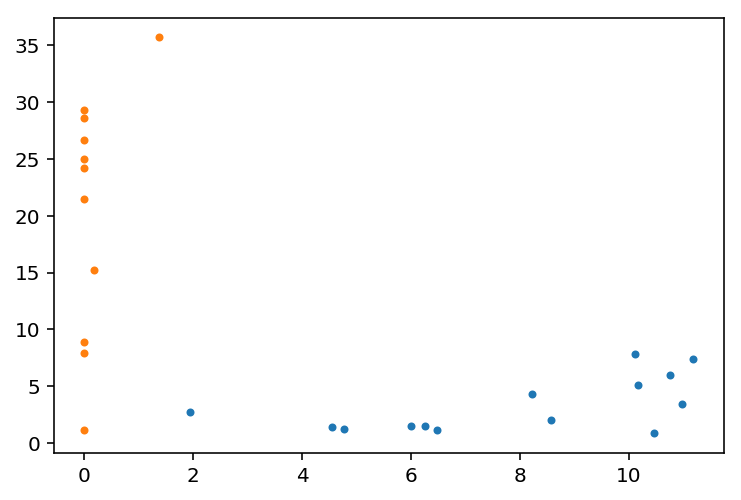

In [28]:
plt.plot(mg_far, mg_mass,'.')
plt.plot(far3_conf, c_mass,'.')

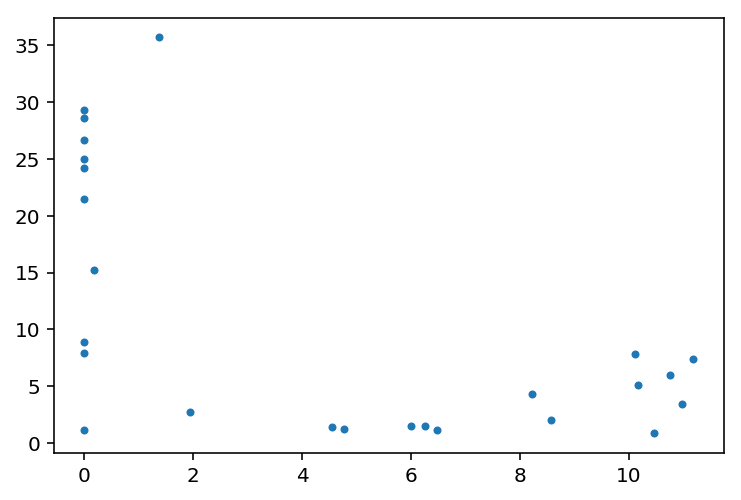

In [32]:
# append the two into one array
all_mass = mg_mass + c_mass
all_far = mg_far + far3_conf
plt.plot(all_far,all_mass,'.')

In [48]:
from matplotlib.patches import Ellipse
from scipy.stats import norm
from sklearn.cluster import KMeans
import sklearn.preprocessing

Text(0, 0.5, 'Chirp Mass $[M_\\odot]$')

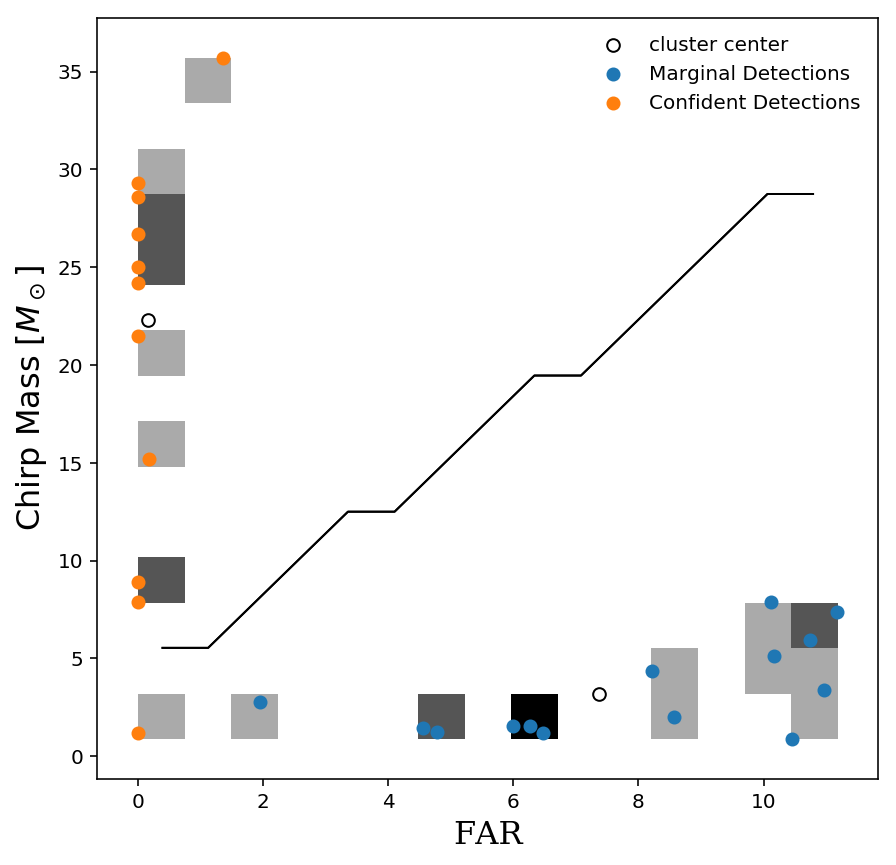

In [72]:
nbins = 15

X = np.vstack([all_far, all_mass]).T

# Compute a 2D histogram  of the input
H, far_bins, mass_bins = np.histogram2d(all_far, all_mass, nbins)


# Compute the KMeans clustering
n_clusters = 2
scaler = sklearn.preprocessing.StandardScaler()
clf = KMeans(n_clusters)
clf.fit(scaler.fit_transform(X))

# Visualize the results
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

# plot density
ax = plt.axes()
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[far_bins[0], far_bins[-1],
                  mass_bins[0], mass_bins[-1]],
          cmap=plt.cm.binary)

# plot cluster centers
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k', label = 'cluster center')

# plot cluster boundaries
far_centers = 0.5 * (far_bins[1:] + far_bins[:-1])
mass_centers = 0.5 * (mass_bins[1:] + mass_bins[:-1])

Xgrid = np.meshgrid(far_centers, mass_centers)

Xgrid = np.array(Xgrid).reshape((2, nbins*nbins)).T

H = clf.predict(scaler.transform(Xgrid)).reshape((nbins, nbins))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(far_centers, mass_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
ax.scatter(mg_far, mg_mass, label='Marginal Detections')
ax.scatter(far3_conf, c_mass, label= 'Confident Detections')
ax.legend(frameon = False)
ax.set_xlabel('FAR', family = 'serif', fontsize=16)
ax.set_ylabel(r'Chirp Mass $[M_\odot]$',fontsize=16)

25